<h1>Импорт библиотек

In [14]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [23]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    total_sum = 0
    for i in range(len(X)):
        total_sum += np.sum(np.dot(X[i], V[i]))
    return total_sum

def test_prod():
    matrix1 = np.array([[1, 2], [3, 4]])
    matrix2 = np.array([[2, 0], [1, 2]])
    vector1 = np.array([[1], [2]])
    vector2 = np.array([[3], [4]]) 

    X = [matrix1, matrix2]
    V = [vector1, vector2]

    assert sum_prod(X, V) == 33

test_prod()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [26]:
def binarize(M, threshold=0.5):
    binary_matrix = np.where(M > threshold, 1, 0)
    return binary_matrix

def test_binarize():
    matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    threshold = 5
    
    binary_matrix = binarize(matrix, threshold)
    
    expected_result = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1]])
    
    assert np.array_equal(binary_matrix, expected_result)

test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [35]:
def unique_rows(mat):
    unique_elements_rows = [np.unique(row) for row in mat]
    return unique_elements_rows

def unique_columns(mat):
    unique_elements_cols = [np.unique(mat[:, i]) for i in range(mat.shape[1])]
    return unique_elements_cols

def test_unique_rows():
    matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    
    unique_elements_rows = unique_rows(matrix)
    
    expected_result = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]
    
    assert all(np.array_equal(a, b) for a, b in zip(unique_elements_rows, expected_result))

def test_unique_columns():
    matrix = np.array([[1, 2, 3], [4, 2, 6], [7, 8, 3]])
    
    unique_elements_cols = unique_columns(matrix)
    
    expected_result = [np.array([1, 4, 7]), np.array([2, 8]), np.array([3, 6])]
    
    assert all(np.array_equal(a, b) for a, b in zip(unique_elements_cols, expected_result))

test_unique_rows()
test_unique_columns()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

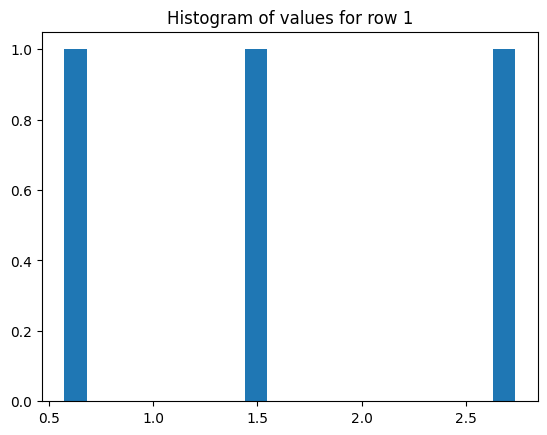

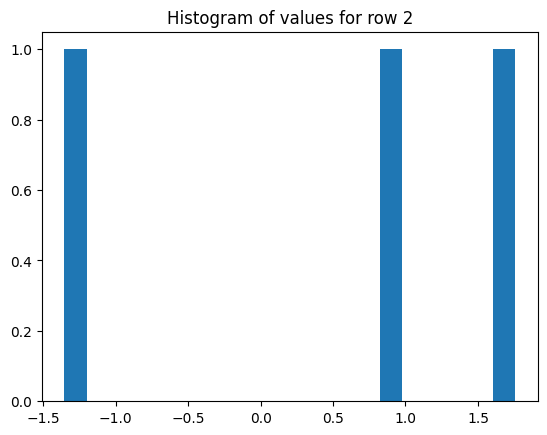

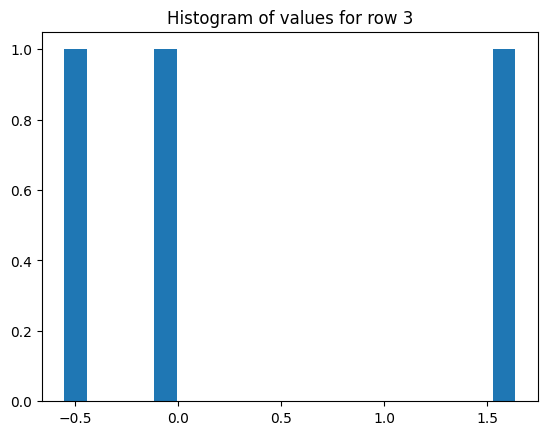

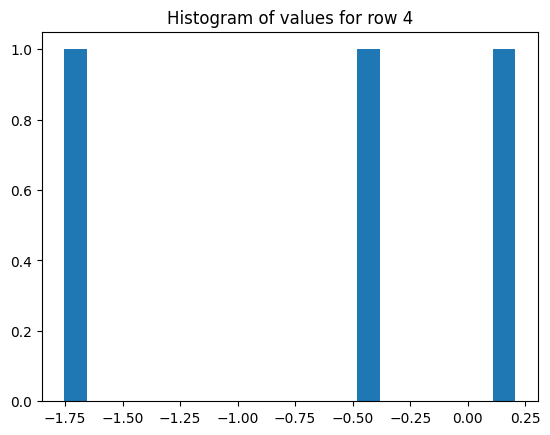

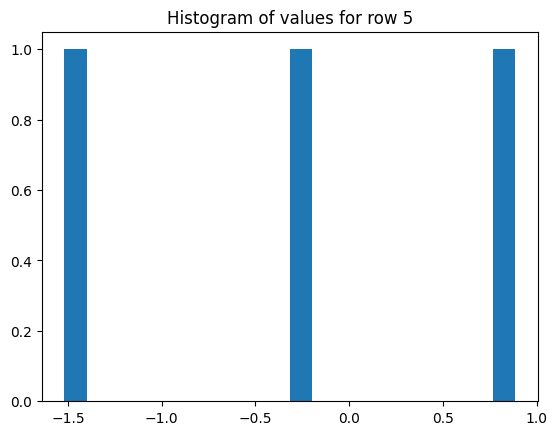

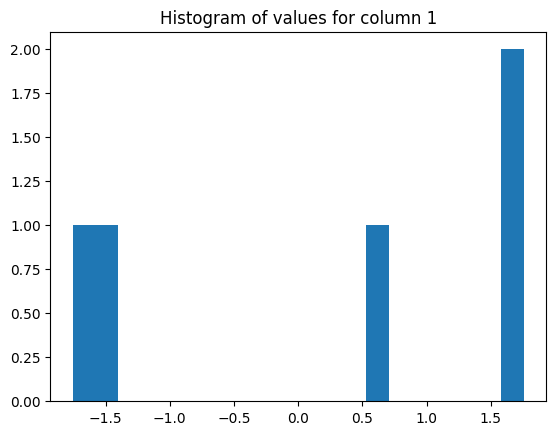

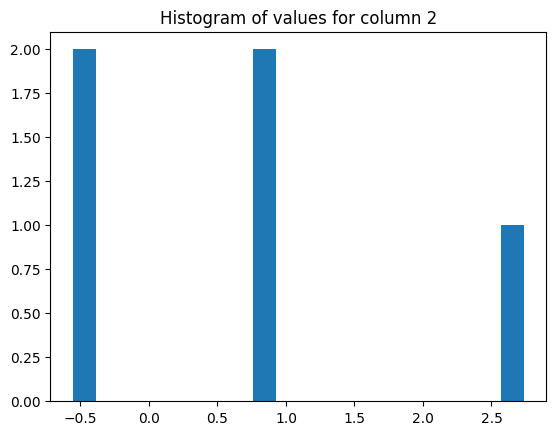

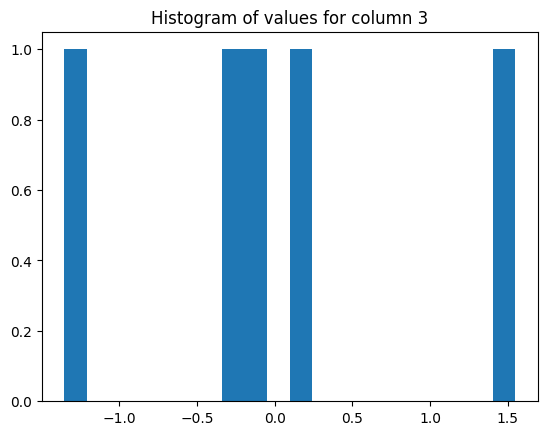

Row Means: [ 1.6193855   0.44117088  0.33874289 -0.66279279 -0.30262848]
Row Variances: [0.78232477 1.72902855 0.88086413 0.66459776 0.9645923 ]
Column Means: [0.13870186 0.70963679 0.01198815]
Column Variances: [2.27590724 1.42166444 0.86990624]


In [28]:
def fill_matrix_normal(m, n):
    matrix = np.random.normal(size=(m, n))
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], bins=20)
        plt.title(f'Histogram of values for row {i+1}')
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=20)
        plt.title(f'Histogram of values for column {j+1}')
        plt.show()

    return row_means, row_vars, col_means, col_vars

m = 5
n = 3
row_means, row_vars, col_means, col_vars = fill_matrix_normal(m, n)
print("Row Means:", row_means)
print("Row Variances:", row_vars)
print("Column Means:", col_means)
print("Column Variances:", col_vars)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [45]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

def test_chess():
    assert chess(3, 4, 1, 0) == [[1, 0, 1, 0],
                                 [0, 1, 0, 1],
                                 [1, 0, 1, 0]]
    assert chess(2, 2, 9, 7) == [[9, 7],
                                 [7, 9]]
    assert chess(4, 3, 0, 1) == [[0, 1, 0],
                                 [1, 0, 1],
                                 [0, 1, 0],
                                 [1, 0, 1]]
    
    test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [66]:
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = Image.new('RGB', (m, n), background_color) 
    draw = ImageDraw.Draw(img) 
    draw.rectangle([0, 0, a, b], fill=rectangle_color) 
    img.show() 

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = Image.new('RGB', (m, n), background_color) 
    draw = ImageDraw.Draw(img) 
    draw.ellipse([0, 0, a, b], fill=ellipse_color) 
    img.show() 

draw_rectangle(100, 50, 200, 150, (255, 255, 0), (255, 255, 255)) 
draw_ellipse(100, 50, 200, 150, (255, 0, 255), (255, 255, 255)) 


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [54]:
time_series = np.array([3, 5, 6, 3, 2, 5, 9, 7, 6, 4, 8, 9, 10, 7, 4, 3, 5])

mean = np.mean(time_series)

variance = np.var(time_series)

std_dev = np.std(time_series)

local_maxima = (np.diff(np.sign(np.diff(time_series))) < 0).nonzero()[0] + 1
local_minima = (np.diff(np.sign(np.diff(time_series))) > 0).nonzero()[0] + 1

def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

p = 3
smoothed_series = moving_average(time_series, p)

print("Математическое ожидание:", mean)
print("Дисперсия:", variance)
print("СКО:", std_dev)
print("Локальные максимумы:", local_maxima)
print("Локальные минимумы:", local_minima)
print("Сглаженный временной ряд:", smoothed_series)

Математическое ожидание: 5.647058823529412
Дисперсия: 5.404844290657441
СКО: 2.3248320994552363
Локальные максимумы: [ 2  6 12]
Локальные минимумы: [ 4  9 15]
Сглаженный временной ряд: [4.66666667 4.66666667 3.66666667 3.33333333 5.33333333 7.
 7.33333333 5.66666667 6.         7.         9.         8.66666667
 7.         4.66666667 4.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [55]:
def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    return np.eye(num_classes)[labels]

labels = np.array([0, 2, 3, 0])

one_hot_encoded = one_hot_encoding(labels)

print(one_hot_encoded)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
